In [1]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from   scipy.stats               import ttest_1samp, ttest_ind
%matplotlib inline

# Remove warnings

import warnings
warnings.filterwarnings('ignore')

#### <u> Problem 1 <u> :

##### <u> Wholesale Customers Analysis<u>

###### Problem Statement:
    A wholesale distributor operating in different regions of Portugal has information on annual spending of several items in their stores across different regions and channels. The data consists of 440 large retailers’ annual spending on 6 different varieties of products in 3 different regions (Lisbon, Oporto, Other) and across different sales channel (Hotel, Retail).

In [2]:
# Load the Wholesale distributer dataset

wsale = pd.read_csv('Wholesale Customer.csv')
wsale.head() # check whether the data is loaded correctly

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


In [3]:
# Making Buyer/Spender as index

wsale.set_index('Buyer/Spender', inplace = True)

In [4]:
wsale.tail() #end of data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Buyer/Spender,,,,,,,,
436,Hotel,Other,29703,12051,16027,13135,182,2204
437,Hotel,Other,39228,1431,764,4510,93,2346
438,Retail,Other,14531,15488,30243,437,14841,1867
439,Hotel,Other,10290,1981,2232,1038,168,2125
440,Hotel,Other,2787,1698,2510,65,477,52


In [5]:
# Information about the dataset

wsale.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440 entries, 1 to 440
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Channel           440 non-null    object
 1   Region            440 non-null    object
 2   Fresh             440 non-null    int64 
 3   Milk              440 non-null    int64 
 4   Grocery           440 non-null    int64 
 5   Frozen            440 non-null    int64 
 6   Detergents_Paper  440 non-null    int64 
 7   Delicatessen      440 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 30.9+ KB


<b> 1.1 Use methods of descriptive statistics to summarize data. Which Region and which Channel seems to spend more? Which Region and which Channel seems to spend less? <b>

In [6]:
wsale.describe(include = 'all') #Summarize the data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440,440,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
unique,2,3,NaN,NaN,NaN,NaN,NaN,NaN
top,Hotel,Other,NaN,NaN,NaN,NaN,NaN,NaN
freq,298,316,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,NaN,NaN,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,NaN,NaN,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,NaN,NaN,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,NaN,NaN,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,NaN,NaN,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000


In [7]:
items = wsale.dtypes[wsale.dtypes != 'object'].index
items

Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper',
       'Delicatessen'],
      dtype='object')

In [8]:
wsale['Total Spend'] = wsale.sum(axis = 1, numeric_only=True)
wsale

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total Spend
Buyer/Spender,,,,,,,,,
1,Retail,Other,12669,9656,7561,214,2674,1338,34112
2,Retail,Other,7057,9810,9568,1762,3293,1776,33266
3,Retail,Other,6353,8808,7684,2405,3516,7844,36610
4,Hotel,Other,13265,1196,4221,6404,507,1788,27381
5,Retail,Other,22615,5410,7198,3915,1777,5185,46100
...,...,...,...,...,...,...,...,...,...
436,Hotel,Other,29703,12051,16027,13135,182,2204,73302
437,Hotel,Other,39228,1431,764,4510,93,2346,48372
438,Retail,Other,14531,15488,30243,437,14841,1867,77407


In [9]:
df = wsale.groupby(['Region', 'Channel'])
df['Total Spend'].sum().sort_values(ascending = True)

Region  Channel
Oporto  Hotel       719150
        Retail      835938
Lisbon  Retail      848471
        Hotel      1538342
Other   Retail     4935522
        Hotel      5742077
Name: Total Spend, dtype: int64

In [10]:
print(wsale[['Region','Total Spend']].groupby('Region').sum().sort_values(by ='Total Spend', ascending = True))

        Total Spend
Region             
Oporto      1555088
Lisbon      2386813
Other      10677599


In [11]:
print(wsale[['Channel','Total Spend']].groupby('Channel').sum().sort_values(by ='Total Spend', ascending = True))

         Total Spend
Channel             
Retail       6619931
Hotel        7999569


<b> 1.2 There are 6 different varieties of items are considered. Do all varieties show similar behaviour across Region and Channel? <b>

In [12]:
# Taking the total of all items across Region and channel (excluding the total spend)

df5 = pd.pivot_table(wsale, index=['Channel', 'Region'], aggfunc=sum)
del(df5['Total Spend'])

df5

Delicatessen  Detergents_Paper    Fresh  Frozen  Grocery  \
Channel Region                                                             
Hotel   Lisbon         70632             56081   761233  184512   237542   
        Oporto         30965             13516   326215  160861   123074   
        Other         320358            165990  2928269  771606   820101   
Retail  Lisbon         33695            148055    93600   46514   332495   
        Oporto         23541            159795   138506   29271   310200   
        Other         191752            724420  1032308  158886  1675150   

                   Milk  
Channel Region           
Hotel   Lisbon   228342  
        Oporto    64519  
        Other    735753  
Retail  Lisbon   194112  
        Oporto   174625  
        Other   1153006

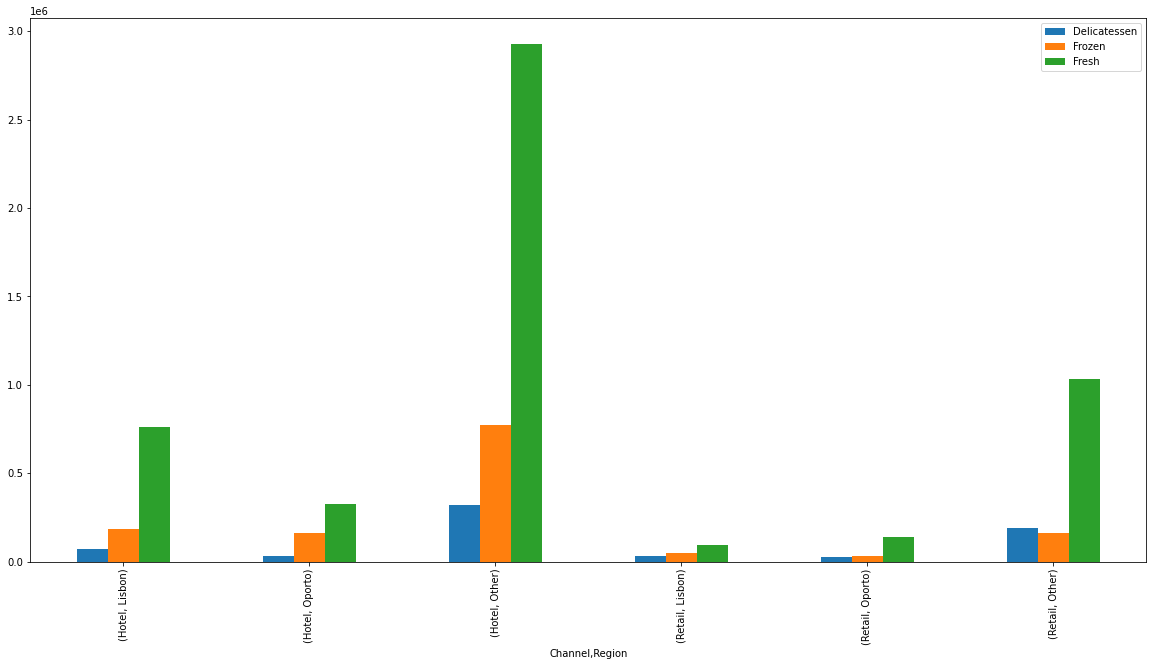

In [13]:
df5[['Delicatessen','Frozen','Fresh']].plot(kind = 'bar', figsize = (20,10));

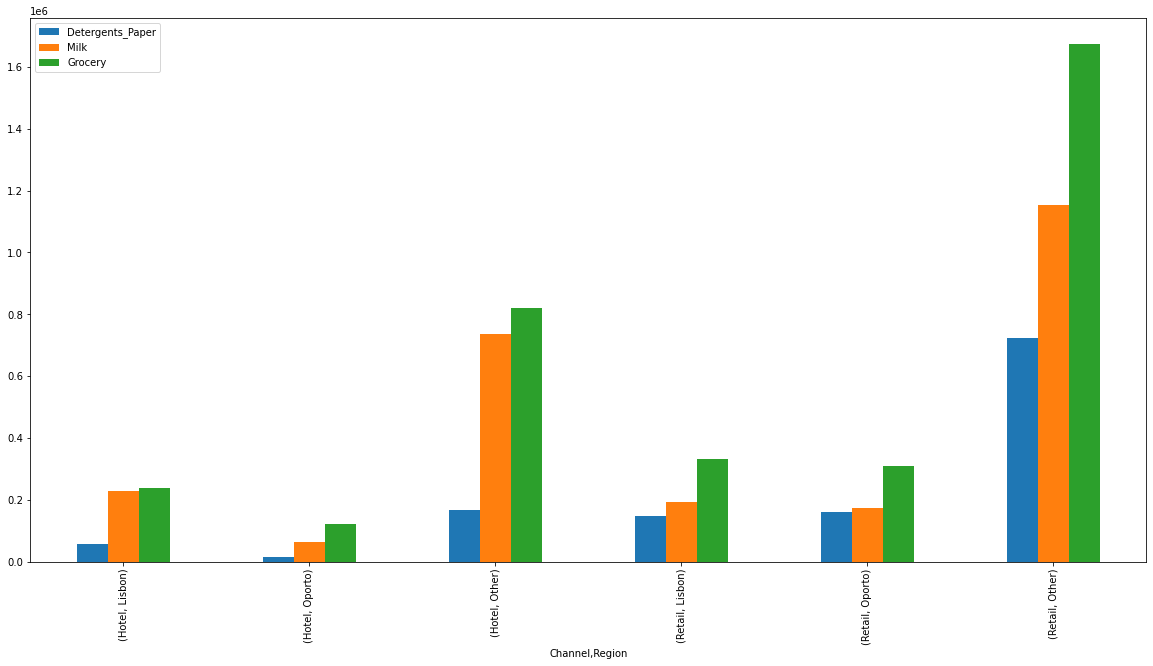

In [14]:
df5[['Detergents_Paper','Milk','Grocery']].plot(kind = 'bar', figsize = (20,10));

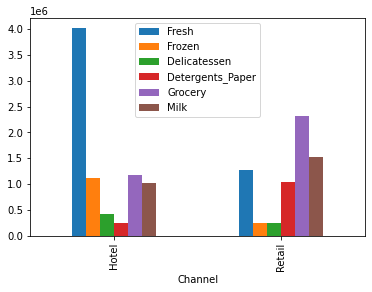

In [15]:
df = wsale[['Channel','Fresh','Frozen','Delicatessen','Detergents_Paper','Grocery','Milk']].groupby('Channel').sum()
df.plot(kind = 'bar' )

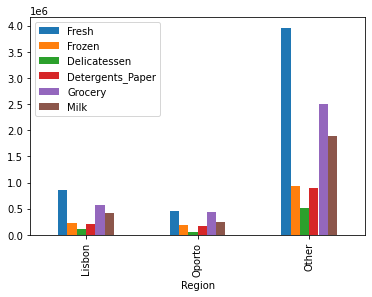

In [16]:
df = wsale[['Region','Fresh','Frozen','Delicatessen','Detergents_Paper','Grocery','Milk']].groupby('Region').sum()
df.plot(kind = 'bar' )

<b> 1.3 On the basis of descriptive measure of variability, which item shows the most inconsistent behavior? Which items show the least inconsistent behaviour? <b>
 

In [18]:
# X=Creating a new df with mean and std of the items

df2 = wsale.describe()[1:3].T
df2['CoV'] = df2['std'] / df2['mean']
df2

,mean,std,CoV
Fresh,12000.297727,12647.328865,1.053918
Milk,5796.265909,7380.377175,1.273299
Grocery,7951.277273,9503.162829,1.195174
Frozen,3071.931818,4854.673333,1.580332
Detergents_Paper,2881.493182,4767.854448,1.654647
Delicatessen,1524.870455,2820.105937,1.849407
Total Spend,33226.136364,26356.301730,0.793240


<b> 1.4 Are there any outliers in the data? <b>
   

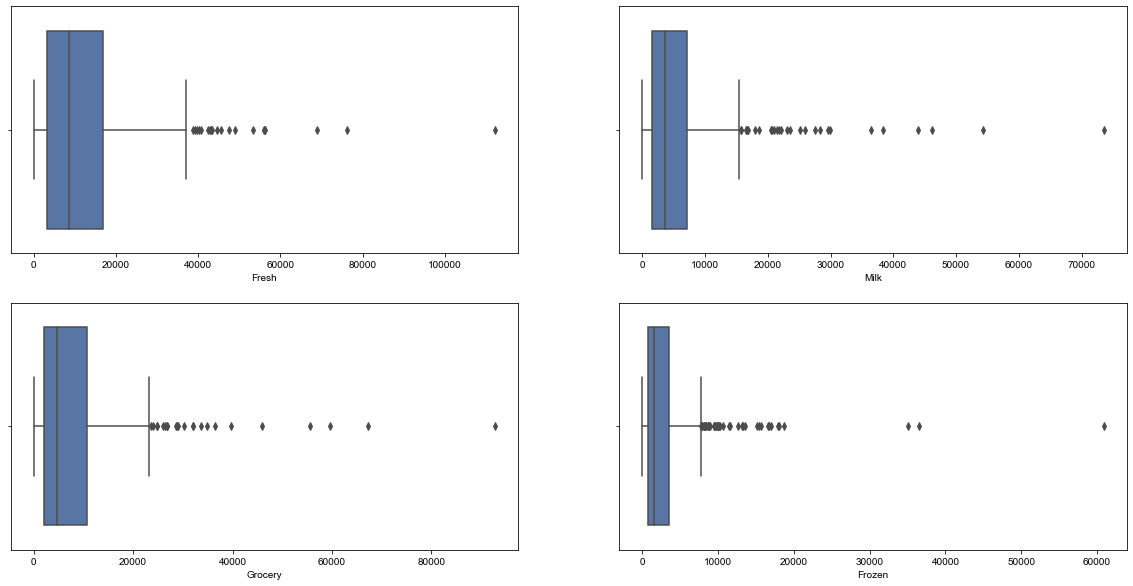

In [19]:
# Boxplot for outliers
fig, ax = plt.subplots(2,2, figsize= (20,10))
sns.set(font_scale = 0.8)

sns.boxplot(wsale.Fresh,ax = ax[0][0]);
sns.boxplot(wsale.Milk, ax = ax[0][1]);
sns.boxplot(wsale.Grocery, ax = ax[1][0]);
sns.boxplot(wsale.Frozen, ax = ax[1][1]);

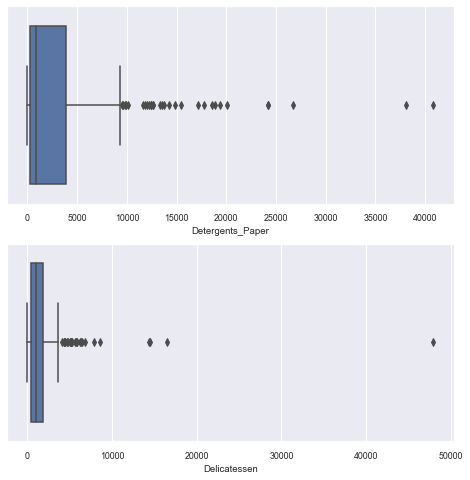

In [20]:
fig, ax = plt.subplots(2, figsize=(8,8))

sns.boxplot(wsale['Detergents_Paper'],ax = ax[0] );
sns.boxplot(wsale['Delicatessen'], ax = ax[1]);

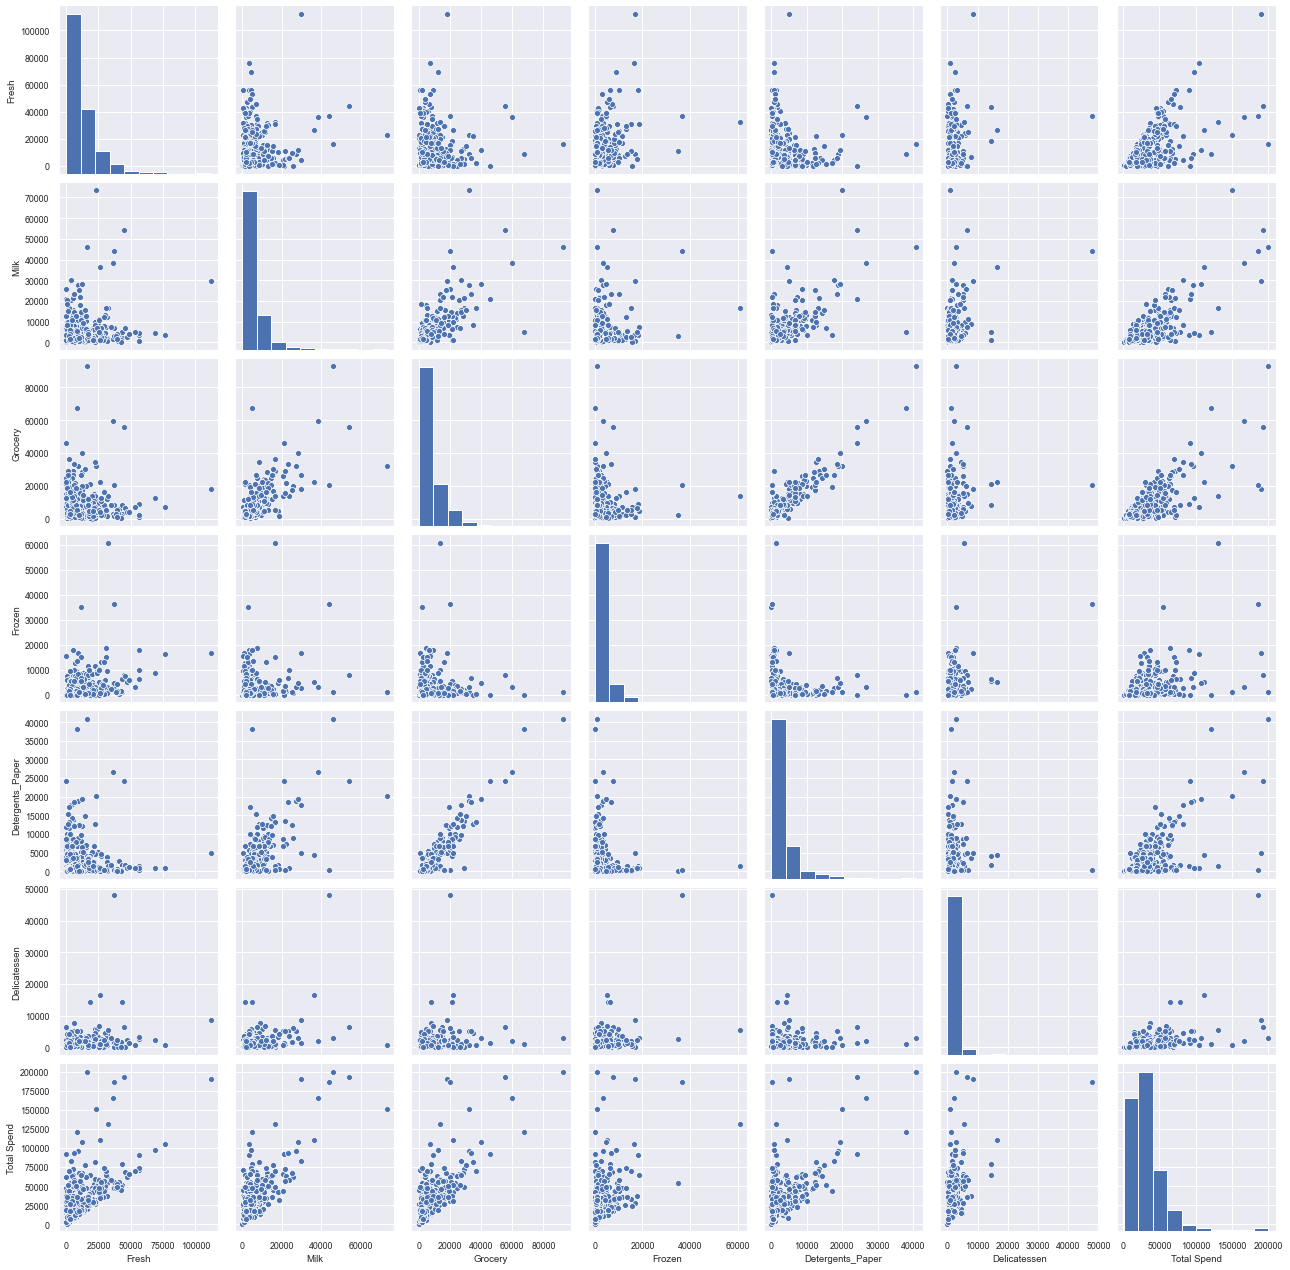

In [21]:
sns.pairplot(wsale)

#### <u> Problem 2 <u> :

##### <u> Survey of undergrad students<u>

###### Problem Statement:
    The Student News Service at Clear Mountain State University (CMSU) has decided to gather data about the undergraduate students that attend CMSU. CMSU creates and distributes a survey of 14 questions and receives responses from 62 undergraduates (stored in the Survey data set).

In [22]:
# Load the Survey dataset

survey = pd.read_csv('Survey-1.csv')
survey.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


In [23]:
# Making ID as index

survey.set_index('ID', inplace = True)

In [24]:
survey.tail()

,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
ID,,,,,,,,,,,,,
58,Female,21,Senior,International Business,No,2.4,Part-Time,40.0,1,3,1000,Laptop,10
59,Female,20,Junior,CIS,No,2.9,Part-Time,40.0,2,4,350,Laptop,250
60,Female,20,Sophomore,CIS,No,2.5,Part-Time,55.0,1,4,500,Laptop,500
61,Female,23,Senior,Accounting,Yes,3.5,Part-Time,30.0,2,3,490,Laptop,50
62,Female,23,Senior,Economics/Finance,No,3.2,Part-Time,70.0,2,3,250,Laptop,0


In [25]:
# Information about the dataset and missing values

survey.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 1 to 62
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             62 non-null     object 
 1   Age                62 non-null     int64  
 2   Class              62 non-null     object 
 3   Major              62 non-null     object 
 4   Grad Intention     62 non-null     object 
 5   GPA                62 non-null     float64
 6   Employment         62 non-null     object 
 7   Salary             62 non-null     float64
 8   Social Networking  62 non-null     int64  
 9   Satisfaction       62 non-null     int64  
 10  Spending           62 non-null     int64  
 11  Computer           62 non-null     object 
 12  Text Messages      62 non-null     int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 6.8+ KB


In [26]:
# Summary of all the columns in the dataset

survey.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Gender,62,2,Female,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,62,NaN,NaN,NaN,21.129,1.43131,18,20,21,22,26
Class,62,3,Senior,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Major,62,8,Retailing/Marketing,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Grad Intention,62,3,Yes,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GPA,62,NaN,NaN,NaN,3.12903,0.377388,2.3,2.9,3.15,3.4,3.9
Employment,62,3,Part-Time,43,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,62,NaN,NaN,NaN,48.5484,12.0809,25,40,50,55,80
Social Networking,62,NaN,NaN,NaN,1.51613,0.844305,0,1,1,2,4
Satisfaction,62,NaN,NaN,NaN,3.74194,1.21379,1,3,4,4,6


<b> 2.1. For this data, construct the following contingency tables (Keep Gender as row variable) 2.1.1. Gender and Major 2.1.2. Gender and Grad Intention 2.1.3. Gender and Employment 2.1.4. Gender and Computer <b>

In [27]:
# 2.1.1 Gender and Major

pd.crosstab(survey['Gender'],survey['Major'] )

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


In [28]:
# 2.1.2 Gender and Grad Intention

pd.crosstab(survey['Gender'],survey['Grad Intention'] )

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


In [29]:
# 2.1.3 Gender and Employment

pd.crosstab(survey['Gender'],survey['Employment'] )

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


In [30]:
# 2.1.4 Gender and Computer
pd.crosstab(survey['Gender'],survey['Computer'] )

Computer,Desktop,Laptop,Tablet
Gender,,,
Female,2,29,2
Male,3,26,0


<b> 2.2. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question: What is the probability that a randomly selected CMSU student will be male? What is the probability that a randomly selected CMSU student will be female? <b>

In [31]:
# 2.2.1 What is the probability that a randomly selected CMSU student will be male?

print(survey['Gender'].value_counts())

prob_male = (survey['Gender'].value_counts()[1] / survey['Gender'].count()).round(2)
print('Probability of randomly selected CMSU student will be male is:', prob_male)

Female    33
Male      29
Name: Gender, dtype: int64
Probability of randomly selected CMSU student will be male is: 0.47


In [32]:
# 2.2.2 What is the probability that a randomly selected CMSU student will be female?

print('Probability of randomly selected CMSU student will be female is:', 1-prob_male)

Probability of randomly selected CMSU student will be female is: 0.53


<b> 2.3 Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question: Find the conditional probability of different majors among the male students in CMSU. Find the conditional probability of different majors among the female students of CMSU. <b>

In [33]:
major = pd.crosstab(survey['Gender'],survey['Major'] )
major

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


In [34]:
male_acc = (major['Accounting'][1] / 29).round(2)
male_cis = (major['CIS'][1] / 29).round(2)
male_eco = (major['Economics/Finance'][1] / 29).round(2)
male_bus = (major['International Business'][1] / 29).round(2)
male_mgmt = (major['Management'][1] / 29).round(2)
male_oth = (major['Other'][1] / 29).round(2)
male_mrkt = (major['Retailing/Marketing'][1] / 29).round(2)
male_und = (major['Undecided'][1] / 29).round(2)

print('Out of total male students, the conditional probability of different majors in CMSU is as follows: \n ')
print('Conditional probability of Accounting major among male students: ',male_acc)
print('Conditional probability of CIS major among male students: ',male_cis)
print('Conditional probability of Economics/Finance major among male students: ',male_eco)
print('Conditional probability of International Business major among male students: ',male_bus)
print('Conditional probability of Management major among male students: ',male_mgmt)
print('Conditional probability of Other majors among male students: ',male_oth)
print('Conditional probability of Marketing/Retailing major among male students: ',male_mrkt)
print('Conditional probability of Undecided among male students: ',male_und)

Out of total male students, the conditional probability of different majors in CMSU is as follows: 
 
Conditional probability of Accounting major among male students:  0.14
Conditional probability of CIS major among male students:  0.03
Conditional probability of Economics/Finance major among male students:  0.14
Conditional probability of International Business major among male students:  0.07
Conditional probability of Management major among male students:  0.21
Conditional probability of Other majors among male students:  0.14
Conditional probability of Marketing/Retailing major among male students:  0.17
Conditional probability of Undecided among male students:  0.1


In [35]:
female_acc = (major['Accounting'][0] / 33).round(2)
female_cis = (major['CIS'][0] / 33).round(2)
female_eco = (major['Economics/Finance'][0] / 33).round(2)
female_bus = (major['International Business'][0] / 33).round(2)
female_mgmt = (major['Management'][0] / 33).round(2)
female_oth = (major['Other'][0] / 33).round(2)
female_mrkt = (major['Retailing/Marketing'][0] / 33).round(2)
female_und = (major['Undecided'][0] / 33).round(2)

print('Out of total female students, the conditional probability of different majors in CMSU is as follows: \n ')
print('Conditional probability of Accounting major among female students: ',female_acc)
print('Conditional probability of CIS major among female students: ',female_cis)
print('Conditional probability of Economics/Finance major among female students: ',female_eco)
print('Conditional probability of International Business major among female students: ',female_bus)
print('Conditional probability of Management major among female students: ',female_mgmt)
print('Conditional probability of Other majors among female students: ',female_oth)
print('Conditional probability of Marketing/Retailing major among female students: ',female_mrkt)
print('Conditional probability of Undecided among febmale students: ',female_und)

Out of total female students, the conditional probability of different majors in CMSU is as follows: 
 
Conditional probability of Accounting major among female students:  0.09
Conditional probability of CIS major among female students:  0.09
Conditional probability of Economics/Finance major among female students:  0.21
Conditional probability of International Business major among female students:  0.12
Conditional probability of Management major among female students:  0.12
Conditional probability of Other majors among female students:  0.09
Conditional probability of Marketing/Retailing major among female students:  0.27
Conditional probability of Undecided among febmale students:  0.0


<b> 2.4 Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question: a) Find the probability That a randomly chosen student is a male and intends to graduate. b) Find the probability that a randomly selected student is a female and does NOT have a laptop. <b>

In [36]:
# a) Find the probability That a randomly chosen student is a male and intends to graduate. 

grad = pd.crosstab(survey['Gender'],survey['Grad Intention'] )
print(grad)
print('Probability that a randomly chosen student is a male and intends to graduate: ', (grad['Yes'][1] / 62).round(2),'\n')

# b) Find the probability that a randomly selected student is a female and does NOT have a laptop.

comp = pd.crosstab(survey['Gender'],survey['Computer'] )
print(comp)
print('Probability that a randomly selected student is a female and does not have a laptop: ',((comp['Desktop'][0]+comp['Tablet'][0])/62).round(2))

Grad Intention  No  Undecided  Yes
Gender                            
Female           9         13   11
Male             3          9   17
Probability that a randomly chosen student is a male and intends to graduate:  0.27 

Computer  Desktop  Laptop  Tablet
Gender                           
Female          2      29       2
Male            3      26       0
Probability that a randomly selected student is a female and does not have a laptop:  0.06


<b> 2.5 Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question: a) Find the probability that a randomly chosen student is either a male or has a full-time employment? b) Find the conditional probability that given a female student is randomly chosen, she is majoring in international business or management. <b>

In [37]:
# a) Find the probability that a randomly chosen student is either a male or has a full-time employment?

emp = pd.crosstab(survey['Gender'],survey['Employment'] )
print(emp)
prob_fullemp = 10 / 62
prob_maleandfullemp = 7 / 62
print('Probability that randomly chosen student is a male: ', prob_male)
print('Probability that randomly chosen student has full-time employment: %.2f' %(prob_fullemp))
print('Probability that randomly chosen student is a male and has a full time employment: %.2f' %(prob_maleandfullemp),'\n' )
print('Probability that a randomly chosen student is either a male or has a full-time employment: ', (prob_male + prob_fullemp - prob_maleandfullemp).round(2) )


Employment  Full-Time  Part-Time  Unemployed
Gender                                      
Female              3         24           6
Male                7         19           3
Probability that randomly chosen student is a male:  0.47
Probability that randomly chosen student has full-time employment: 0.16
Probability that randomly chosen student is a male and has a full time employment: 0.11 

Probability that a randomly chosen student is either a male or has a full-time employment:  0.52


In [38]:
# b) Find the conditional probability that given a female student is randomly chosen, she is majoring in international business or management.

print('Female students selecting international business or management: ' ,8)
print('Total female students: ', 33 ,'\n')
print('Conditional probability that given a female student is randomly chosen, she is majoring in international business or management: %.2f' %(8/33))


Female students selecting international business or management:  8
Total female students:  33 

Conditional probability that given a female student is randomly chosen, she is majoring in international business or management: 0.24


<b> 2.6 Construct a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No). The Undecided students are not considered now and the table is a 2x2 table. Do you think graduate intention and being female are independent events? <b>

In [39]:
del(grad['Undecided']) #deleting the undecided column from grad

print(grad)

print('Event A: Graduate intention: ', (28 / 40))
print('Event B: Being a female: ', (20/40))

print('Grad intention and female: ',(11/40))

print('Probability of event A * Probability of event B: ', (0.7 * 0.5))

Grad Intention  No  Yes
Gender                 
Female           9   11
Male             3   17
Event A: Graduate intention:  0.7
Event B: Being a female:  0.5
Grad intention and female:  0.275
Probability of event A * Probability of event B:  0.35


###### Since the P(A-Grad intention) * P(B-Female) is not equal to the P(Grad intention and female), We can say that these two events are dependent events

<b> 2.7 Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending and Text Messages. Answer the following questions based on the data a) If a student is chosen randomly, what is the probability that his/her GPA is less than 3? b) Find conditional probability that a randomly selected male earns 50 or more. Find conditional probability that a randomly selected female earns 50 or more. <b>

In [40]:
# a) If a student is chosen randomly, what is the probability that his/her GPA is less than 3?

gpa_lessthan3 = survey['GPA'][survey['GPA'] < 3].count()
print('Probability that randomly chosen student GPA is less than 3: ',(gpa_lessthan3 / 62).round(2) )

Probability that randomly chosen student GPA is less than 3:  0.27


In [41]:
# b) Find conditional probability that a randomly selected male earns 50 or more.

male_salary = survey[['Gender','Salary']][survey.Gender == 'Male'][survey.Salary >= 50].count()[0]
print('Conditional probability that a randomly selected male earns 50 or more: ', (male_salary / 29).round(2))

# Find conditional probability that a randomly selected female earns 50 or more.

female_salary = survey[['Gender','Salary']][survey.Gender == 'Female'][survey.Salary >= 50].count()[0]
print('Conditional probability that a randomly selected female earns 50 or more: ', (female_salary / 33).round(2))


Conditional probability that a randomly selected male earns 50 or more:  0.48
Conditional probability that a randomly selected female earns 50 or more:  0.55


<b> 2.8 Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending and Text Messages. For each of them comment whether they follow a normal distribution. Write a note summarizing your conclusions. <b>

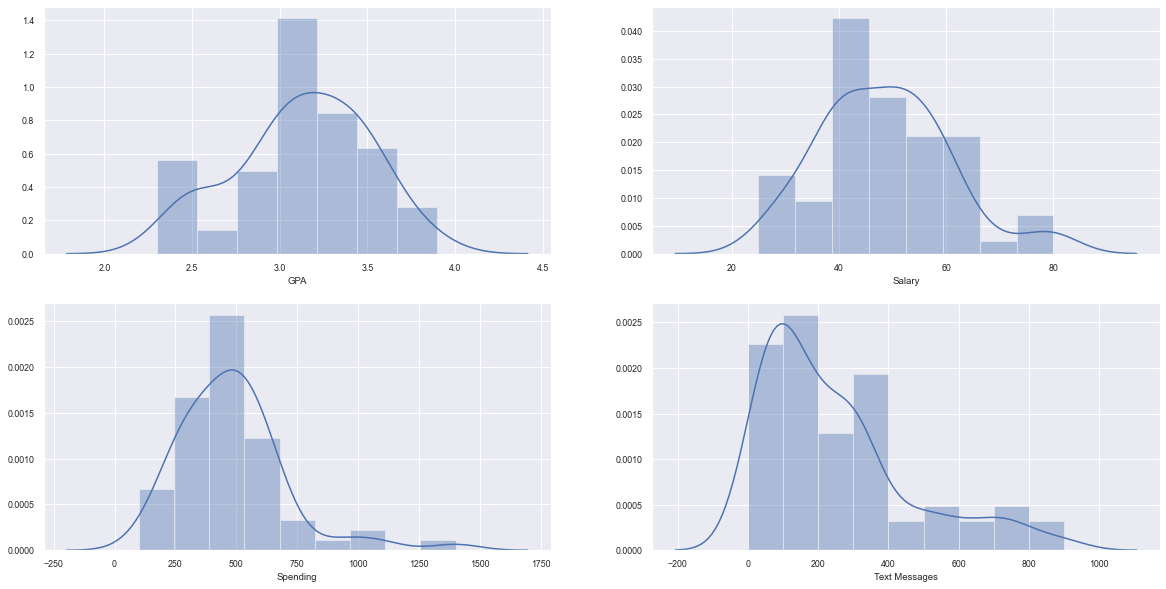

In [42]:
# Distplot for determining whether the continuous variables follow normal distribution

fig, ax = plt.subplots(2,2, figsize= (20,10))
sns.set(font_scale = 0.8)

sns.distplot(survey.GPA ,ax = ax[0][0]);
sns.distplot(survey.Salary, ax = ax[0][1]);
sns.distplot(survey.Spending, ax = ax[1][0]);
sns.distplot(survey['Text Messages'], ax = ax[1][1]);

In [43]:
# Shapiro test to confirm normal distribution
# p-value > alpha (0.05), Normal Distribution
# p-value < alpha (0.05), Not normal distribution

from scipy.stats import shapiro

stat, p = shapiro(survey.GPA)
print('p ( %.3f'%(p),') > alpha (0.05), hence the continuous variable GPA is normally distributed') 
stat, p = shapiro(survey.Salary)
print('p ( %.3f'%p,') < alpha (0.05), hence the continuous variable Salary is not normally distributed')
stat, p = shapiro(survey.Spending)
print('p ( %.3f'%p,') < alpha (0.05), hence the continuous variable Spending is not normally distributed')
stat, p = shapiro(survey['Text Messages'])
print('p ( %.3f'%p,') < alpha (0.05), hence the continuous variable Text messages is not normally distributed \n')

# Find the skewness of the variable
# If the value is greater than '+1' and less than '-1', highly skewed
# If its between (-1 to -0.5) and (0.5 to 1), moderately skewed
# If its between(-0.5 to 0.5), it is approximately symmetric

print('Skew of GPA: %.2f'%stats.skew(survey.GPA))
print('Skew of Salary: %.2f'%stats.skew(survey.Salary))
print('Skew of Spending: %.2f'%stats.skew(survey.Spending))
print('Skew of Text Messages: %.2f'%stats.skew(survey['Text Messages']))

p ( 0.112 ) > alpha (0.05), hence the continuous variable GPA is normally distributed
p ( 0.028 ) < alpha (0.05), hence the continuous variable Salary is not normally distributed
p ( 0.000 ) < alpha (0.05), hence the continuous variable Spending is not normally distributed
p ( 0.000 ) < alpha (0.05), hence the continuous variable Text messages is not normally distributed 

Skew of GPA: -0.31
Skew of Salary: 0.52
Skew of Spending: 1.55
Skew of Text Messages: 1.26


<b> Applying Empirical rule which states that for a normal distribution of a continuous random variable, nearly all of the data will fall within three standard deviations of the mean.

In [90]:
# For GPA continuous variable

print(survey['GPA'].describe())
mean = survey['GPA'].mean()
sd = survey['GPA'].std()

print('GPA variable:')
a = mean + sd
b = mean - sd
print('Approximately %.2f'%((stats.norm.cdf(a,mean,sd) - stats.norm.cdf(b,mean,sd))*100) ,'% of the data falls within one standard deviation from the mean')

a = mean + (2*sd)
b = mean - (2*sd)
print('Approximately %.2f'%((stats.norm.cdf(a,mean,sd) - stats.norm.cdf(b,mean,sd))*100) ,'% of the data falls within two standard deviation from the mean')

a = mean + (3*sd)
b = mean - (3*sd)
print('Approximately %.2f'%((stats.norm.cdf(a,mean,sd) - stats.norm.cdf(b,mean,sd))*100) ,'% of the data falls within three standard deviation from the mean')

count    62.000000
mean      3.129032
std       0.377388
min       2.300000
25%       2.900000
50%       3.150000
75%       3.400000
max       3.900000
Name: GPA, dtype: float64
GPA variable:
Approximately 68.27 % of the data falls within one standard deviation from the mean
Approximately 95.45 % of the data falls within two standard deviation from the mean
Approximately 99.73 % of the data falls within three standard deviation from the mean


#### <u> Problem 3 <u> :

##### <u> A & B Shingles<u>

###### Problem Statement:
        An important quality characteristic used by the manufacturers of ABC asphalt shingles is the amount of moisture the shingles contain when they are packaged. Customers may feel that they have purchased a product lacking in quality if they find moisture and wet shingles inside the packaging.   In some cases, excessive moisture can cause the granules attached to the shingles for texture and colouring purposes to fall off the shingles resulting in appearance problems. To monitor the amount of moisture present, the company conducts moisture tests. A shingle is weighed and then dried. The shingle is then reweighed, and based on the amount of moisture taken out of the product, the pounds of moisture per 100 square feet are calculated. The company would like to show that the mean moisture content is less than 0.35 pound per 100 square feet.The file (A & B shingles.csv) includes 36 measurements (in pounds per 100 square feet) for A shingles and 31 for B shingles

In [91]:
# Load the Wholesale distributer dataset

shingles = pd.read_csv('A & B shingles-1.csv')
shingles.head() # check whether the data is loaded correctly


,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37


In [92]:
shingles.describe()

,A,B
count,36.000000,31.000000
mean,0.316667,0.273548
std,0.135731,0.137296
min,0.130000,0.100000
25%,0.207500,0.160000
50%,0.290000,0.230000
75%,0.392500,0.400000
max,0.720000,0.580000


<b> From looking at the descriptive statistics of the data, we can say that both the shingles are within permissable limits, since the mean of both (A - 0.31 and B - 0.27) is less than 0.35 pound per 100 square feet. But we cannot be sure whether it is statistically significant. <b>

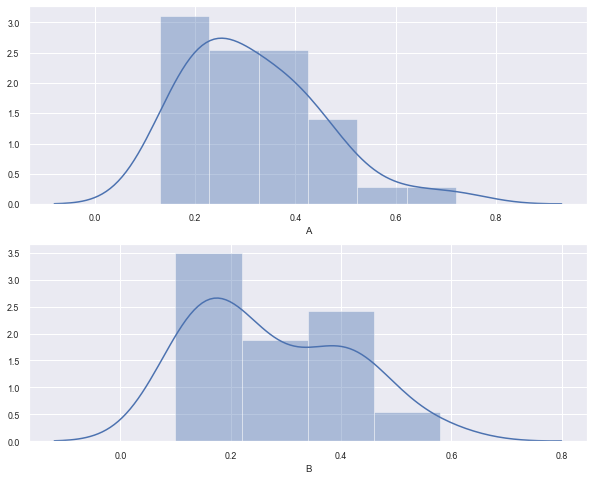

In [93]:
fig,ax = plt.subplots(2, figsize = (10,8))
sns.distplot(shingles.A, ax= ax[0]);
sns.distplot(shingles.B, ax = ax[1]);

<b> 3.1 Do you think there is evidence that mean moisture contents in both types of shingles are within the permissible limits? State your conclusions clearly showing all steps. <b>

<b> To show whether both types of shingles are within the permissible limits (less than 0.35 pound per 100 square feet). We perform one sample T-test for both the shingle types. <b>

<b> One sample T-test Assumptions: <b>
    - The data is continuous and follows normal distribution.
    - Population standard deviation is not known.
    - n (sample size) can be small or large.
    - The samples are randomly selected, independent and come from a normally distributed population with unknown but equal variances.

<b> STEP 1: Define Null and Alternate Hypothesis <b>

    In testing the mean moisture contents in both types of shingles are within the permissible limits.

- Null hypothesis states that mean moisture contents in both types of shingles are not within the permissible limits, $\mu$ is equal to 0.35.
- Alternative hypothesis states that the mean moisture content is less than 0.35 pound per 100 square feet., $\mu$ is less than 0.35.

* $H_0$: $\mu$ = 0.35
* $H_A$: $\mu$ $<$ 0.35

<b> STEP 2: Decide the significance level <b>
        
Here we select $\alpha$ = 0.05.

<b> STEP 3: Identify the test statistic: <b>

We do not know the population standard deviation and n = 36 for shingles A and n = 31 for shingles B. So we use the one sample t test for each shingle seperately and the $t_{STAT}$ test statistic.

<b> STEP 4: Calculate P-value and test statistic:

In [94]:
xbar = shingles['A'].mean()
n = 36
mu = 0.35
sd = shingles['A'].std()

tstat = (xbar - mu) /(sd/(np.sqrt(n)))

dof = n-1
pA=stats.t.cdf(tstat, df=dof)
print('One sample t test for Shingle A\nt statistic: {0} p value: {1} '.format(tstat, pA))

One sample t test for Shingle A
t statistic: -1.4735046253382809 p value: 0.07477633144907479 


In [95]:
tstat,pB=ttest_1samp(shingles.B, 0.35,nan_policy='omit')
print('One sample t test for Shingle B\nt statistic: {0} p value: {1} '.format(tstat, pB/2))

One sample t test for Shingle B
t statistic: -3.1003313069986995 p value: 0.0020904774003191826 


<b> STEP 5: Decide to reject or accept Null Hypothesis

In [96]:
# For Shingles A
alpha_value = 0.05 # Level of significance
print('Level of significance: %.2f' %alpha_value)
if pA < alpha_value: 
    print('We have evidence to reject the null hypothesis since p value < Level of significance')
else:
    print('We have no evidence to reject the null hypothesis since p value > Level of significance') 

print ("Our one-sample t-test p-value for Shingle A = ", pA)

Level of significance: 0.05
We have no evidence to reject the null hypothesis since p value > Level of significance
Our one-sample t-test p-value for Shingle A =  0.07477633144907479


Here, p value is 0.07477633 and it is greater than 5% level of significance

So the statistical decision is failing to reject the null hypothesis at 5% level of significance.

<b> So at 95% confidence level, there is no sufficient evidence to prove that mean moisture contents in shingle A is within the permissible limits.

In [97]:
# For Shingles B
alpha_value = 0.05 # Level of significance
print('Level of significance: %.2f' %alpha_value)
if pB < alpha_value: 
    print('We have evidence to reject the null hypothesis since p value < Level of significance')
else:
    print('We have no evidence to reject the null hypothesis since p value > Level of significance') 

print ("Our one-sample t-test p-value for Shingle B = ", pB/2)

Level of significance: 0.05
We have evidence to reject the null hypothesis since p value < Level of significance
Our one-sample t-test p-value for Shingle B =  0.0020904774003191826


Here, p value is 0.002090477 and it is lesser than 5% level of significance

So the statistical decision is to reject the null hypothesis.

<b> Hence we reject Null Hypothesis and conclude that there is sufficient evidence to prove that mean moisture contents in shingle B is within the permissible limits with 0.2% of being wrong.

<b> 3.2 Do you think that the population means for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed? <b>

<b> To show that the population means for shingles A and B are equal, We perform Two sample T-test with independent samples. 
    
Two sample (Independent) T-Test Assumptions:
    - The data should be continuous and follow the normal probability distribution.
    - Both sample have identical variance.
    - The two samples are independent. There is no relationship between the individuals in one sample as compared to the other (as there is in the paired t-test).
    - Both samples are simple random samples from their respective populations. Each individual in the population has an equal probability of being selected in the sample.
    - Population Standard deviation not known.
    
STEP 1: Define null and alternate hypothesis
    
In testing the population means for shingles A and B, the null hypothesis states that the population means for shingles A and B are equal, $\mu{A}$ equals $\mu{B}$. The alternative hypothesis states that the population means for shingles A and B are not equal, $\mu{A}$ is not equal to $\mu{B}$.

* $H_0$: $\mu{A}$ - $\mu{B}$ =      0 ; $\mu{A}$ = $\mu{B}$
* $H_A$: $\mu{A}$ - $\mu{B}$ $\neq$  0 ; $\mu{A}$ $\neq$ $\mu{B}$
    
    Its a two tailed test.
    
<b> STEP 2: Decide the significance level <b>
        
Here we select $\alpha$ = 0.05.


<b> STEP 3: Identify the test statistics:
    
* We have two samples and we do not know the population standard deviation.
* Sample sizes for both samples are  different. (n=36 for Shingles A and n=31 for Shingles B)
* So using the t distribution and the $t_{STAT}$ test statistic for two sample independent test.

<b> STEP 4: Calculate the p-value and test statistic

In [98]:
print('Mean of A shingles', shingles.A.mean())
print('Mean of B shingles', shingles.B.mean())

print('STD of A shingles', shingles.A.std())
print('STD of B shingles', shingles.B.std())

# Two sample T-test results

tstat, p = ttest_ind(shingles.A,shingles.B, equal_var = True, nan_policy='omit')
print('\nTwo sample independent t test for Shingle A&B\nt statistic: {0} p value: {1} '.format(tstat, p))


Mean of A shingles 0.3166666666666666
Mean of B shingles 0.2735483870967742
STD of A shingles 0.13573082605973166
STD of B shingles 0.13729647694185443

Two sample independent t test for Shingle A&B
t statistic: 1.2896282719661123 p value: 0.2017496571835306 


<b> STEP 5: Decide to accept or reject Null:

In [99]:
# If p_value < 0.05 => alternative hypothesis: they don't have the same mean at the 5% significance level

print ("Two-sample t-test p-value=", p)

alpha_level = 0.05 # Level of significance

if p < alpha_level:
    print('We have enough evidence to reject the null hypothesis in favour of alternative hypothesis')
    print('We conclude that the population means of both the shingles are not same.')
else:
    print('We do not have enough evidence to reject the null hypothesis in favour of alternative hypothesis')
    print('We conclude that population means of both the shingles are same.')

Two-sample t-test p-value= 0.2017496571835306
We do not have enough evidence to reject the null hypothesis in favour of alternative hypothesis
We conclude that population means of both the shingles are same.


<b> Reservations about the test performed: <b>
    - If we compare the means of the two sample distribution, we see that there is slight difference in the means, but statistically it does not hold good
    - The smaller mean of shingle B can be due to the comparatively less number of measurements.
    - The variance of the both the shingles are approximately equal.
    - We are unsure of the sampling error present in the data.
    - Even though the population means of both are equal, we can say from the above one sample t-test performed that only in Shingle B measurements, mean moisture content is within permissible limits.